<a id ='2' ></a>
<h1 style = "color:black;border:0;font-family:Segoe Print;font-weight:bold">Loan Prediction System 📚</h1> 


<h3 style = "color:black;border:0;font-family:Segoe Print;font-weight:bold">Outline 📚</h3>  

 - <p style = "color:black;font-family:Segoe Print;font-weight:bold">Loading and Exploring the data</p>  
 - <p style = "color:black;font-family:Segoe Print;font-weight:bold">Data Preprocessing</p> 
 - <p style = "color:black;font-family:Segoe Print;font-weight:bold">Feature Engineering</p>
 - <p style = "color:black;font-family:Segoe Print;font-weight:bold">Dropping Unecessary columns</p>  
 - <p style = "color:black;font-family:Segoe Print;font-weight:bold">Data Visualization</p> 
 - <p style = "color:black;font-family:Segoe Print;font-weight:bold">Encoding the Categorical data</p> 
 - <p style = "color:black;font-family:Segoe Print;font-weight:bold">Splitting Data</p> 
 - <p style = "color:black;font-family:Segoe Print;font-weight:bold">Model Building</p> 
     -<p style = "color:black;font-family:Segoe Print;font-weight:bold">Decision Tree Classifier</p>

     -<p style = "color:black;font-family:Segoe Print;font-weight:bold">Random Forest Classifier</p>
     <span></span>
 - <p style = "color:black;font-family:Segoe Print;font-weight:bold">Model Training</p> 
 - <p style = "color:black;font-family:Segoe Print;font-weight:bold">Model Evaluation</p> 
   <span></span>
   <span><b>For Local Machine</b></span>  
 - <p style = "color:black;font-family:Segoe Print;font-weight:bold">Generate .csv file as output</p>  
   

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

## Data Loading

In [154]:
df=pd.read_csv('data.csv')
ef=pd.read_csv('loan-test.csv')

## Exploring & Understanding the Data

In [155]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [156]:
loan_id=df['Loan_ID']
df=df.drop('Loan_ID',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [157]:
df.shape

(614, 12)

In [158]:
#df.describe()

In [159]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [160]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

## Exploratory Data Analysis
### Data Visualization

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

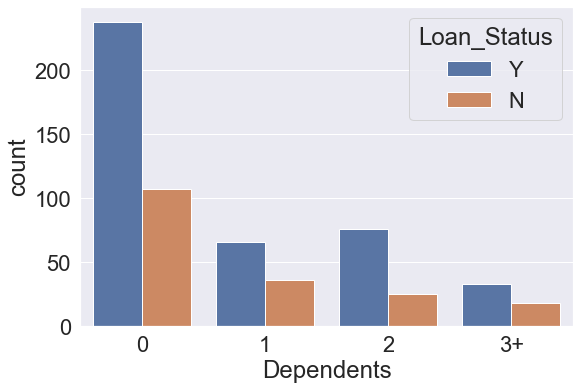

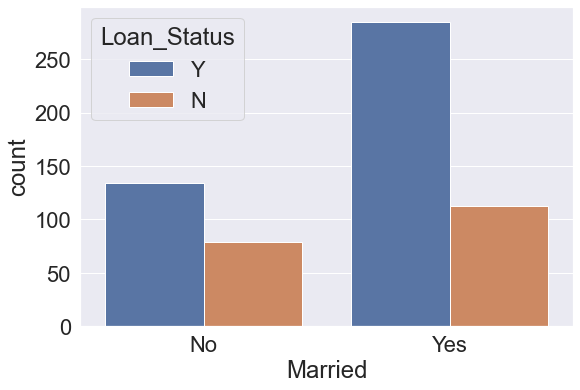

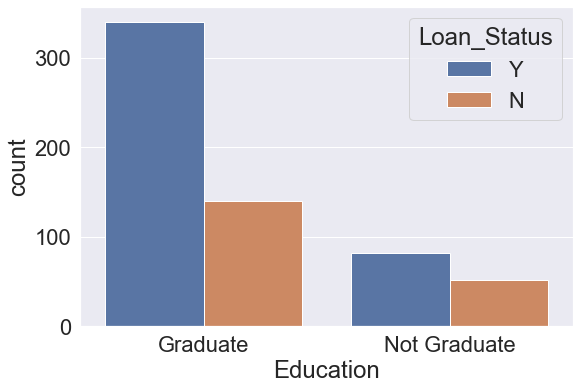

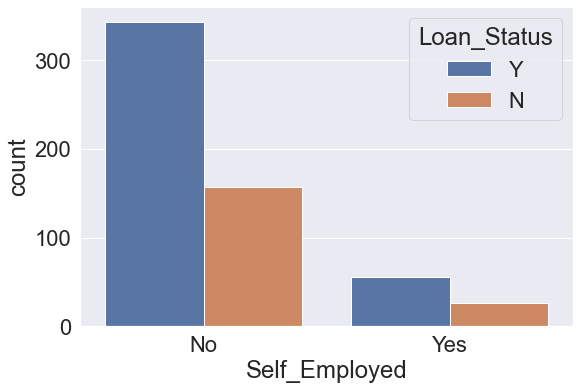

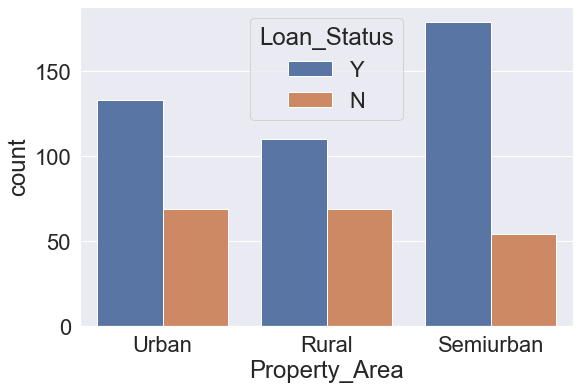

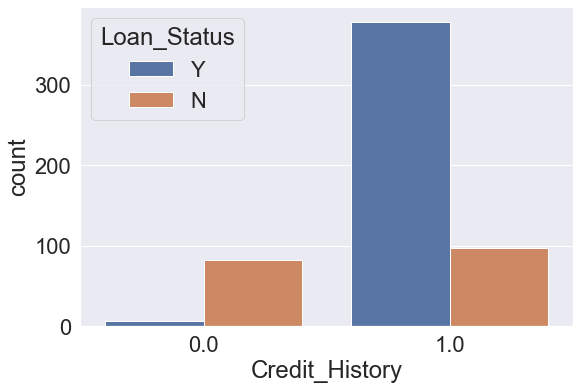

In [161]:
# For catagorical features

plt.figure(figsize = (30, 20))
sns.set(font_scale = 2)
plt.subplot(331)
sns.countplot(df['Dependents'],hue=df['Loan_Status'])


plt.figure(figsize = (30, 20))
sns.set(font_scale = 2)
plt.subplot(333)
sns.countplot(df['Married'],hue=df['Loan_Status'])

plt.figure(figsize = (30, 20))
sns.set(font_scale = 2)
plt.subplot(334)
sns.countplot(df['Education'],hue=df['Loan_Status'])

plt.figure(figsize = (30, 20))
sns.set(font_scale = 2)
plt.subplot(335)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

plt.figure(figsize = (30, 20))
sns.set(font_scale = 2)
plt.subplot(336)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])

plt.figure(figsize = (30, 20))
sns.set(font_scale = 2)
plt.subplot(337)
sns.countplot(df['Credit_History'],hue=df['Loan_Status'])


In [162]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

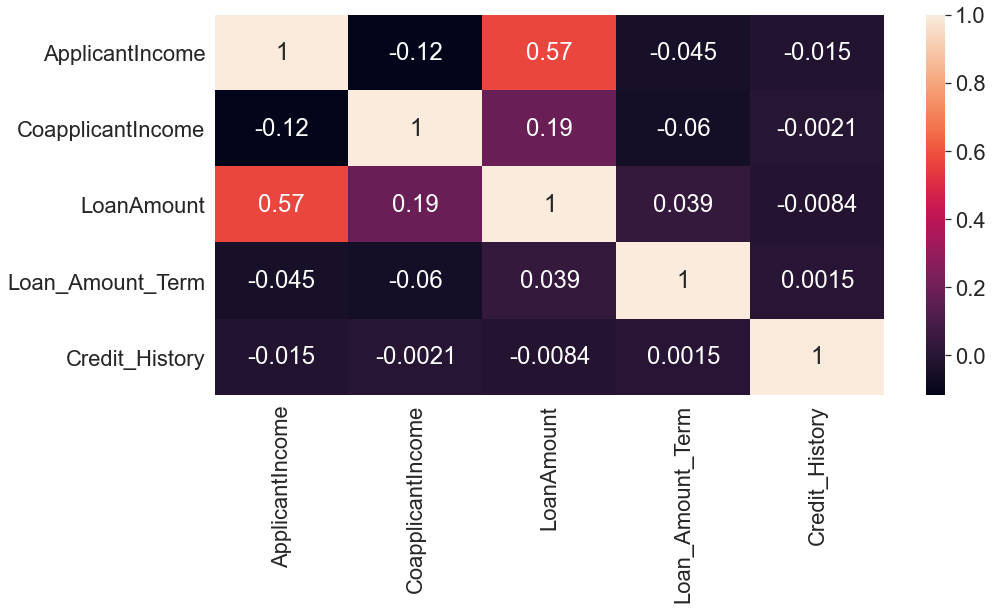

In [163]:
corr= df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True)

(array([ 17., 224., 182.,  81.,  29.,  25.,  15.,   7.,   5.,   7.,   6.,
          3.,   5.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  150.,  1767.,  3384.,  5001.,  6618.,  8235.,  9852., 11469.,
        13086., 14703., 16320., 17937., 19554., 21171., 22788., 24405.,
        26022., 27639., 29256., 30873., 32490., 34107., 35724., 37341.,
        38958., 40575., 42192., 43809., 45426., 47043., 48660., 50277.,
        51894., 53511., 55128., 56745., 58362., 59979., 61596., 63213.,
        64830., 66447., 68064., 69681., 71298., 72915., 74532., 76149.,
        77766., 79383., 81000.]),
 <BarContainer object of 50 artists>)

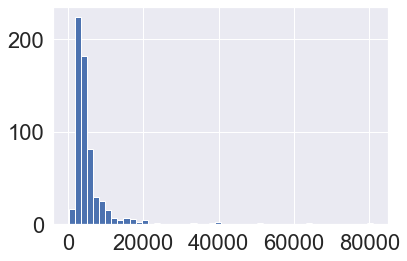

In [164]:
plt.hist(df.ApplicantIncome, bins=50)



(array([561.,  46.,   3.,   0.,   2.,   0.,   0.,   0.,   1.,   1.]),
 array([    0. ,  4166.7,  8333.4, 12500.1, 16666.8, 20833.5, 25000.2,
        29166.9, 33333.6, 37500.3, 41667. ]),
 <BarContainer object of 10 artists>)

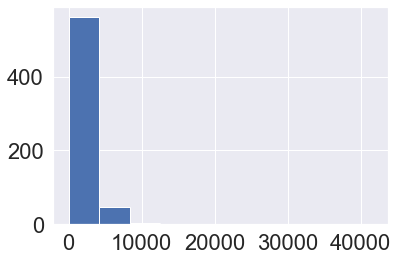

In [165]:
plt.hist(df.CoapplicantIncome, bins=10)

(array([ 72., 310., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <BarContainer object of 10 artists>)

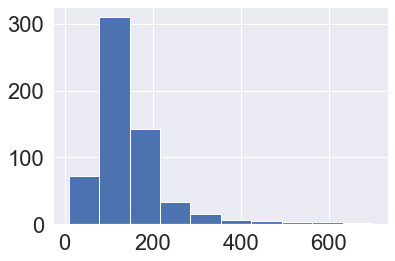

In [166]:
plt.hist(df.LoanAmount, bins=10)

(array([  9.,  47.,   4., 525.,  15.]),
 array([ 12. , 105.6, 199.2, 292.8, 386.4, 480. ]),
 <BarContainer object of 5 artists>)

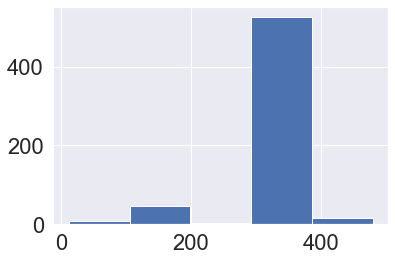

In [167]:
plt.hist(df.Loan_Amount_Term, bins=5)

In [168]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Data Preprocessing

## Checking for Missing Value and Imputation

In [169]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [170]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [171]:
cols= df[["Gender","Married","Dependents","Self_Employed"]]
for i in cols:
    df[i].fillna(df[i].mode().iloc[0], inplace=True)

In [172]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Feature Engineering

In [173]:
df['Total_Income']= df['ApplicantIncome']+df['CoapplicantIncome']
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,7583.0


In [174]:
df['EMI']= df['LoanAmount']/df['Loan_Amount_Term']
Status=df['Loan_Status']

In [175]:
Status=df['Loan_Status']
df= df.drop('Loan_Status',axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,EMI
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,5849.0,0.406700
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,6091.0,0.355556
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,3000.0,0.183333
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,4941.0,0.333333
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,6000.0,0.391667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,2900.0,0.197222
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,4106.0,0.222222
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,8312.0,0.702778
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,7583.0,0.519444


In [176]:
df = pd.concat([df, Status], axis=1, join='outer')
df= df.drop(['ApplicantIncome','CoapplicantIncome'],axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,EMI,Loan_Status
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,5849.0,0.406700,Y
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,6091.0,0.355556,N
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,3000.0,0.183333,Y
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,4941.0,0.333333,Y
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,6000.0,0.391667,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.000000,360.0,1.0,Rural,2900.0,0.197222,Y
610,Male,Yes,3+,Graduate,No,40.000000,180.0,1.0,Rural,4106.0,0.222222,Y
611,Male,Yes,1,Graduate,No,253.000000,360.0,1.0,Urban,8312.0,0.702778,Y
612,Male,Yes,2,Graduate,No,187.000000,360.0,1.0,Urban,7583.0,0.519444,Y


## Checking for Outliers

In [177]:
df.corr()

,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,EMI
LoanAmount,1.000000,0.036475,-0.001431,0.620102,0.491278
Loan_Amount_Term,0.036475,1.000000,-0.004705,-0.070917,-0.501385
Credit_History,-0.001431,-0.004705,1.000000,-0.012563,0.015001
Total_Income,0.620102,-0.070917,-0.012563,1.000000,0.364644
EMI,0.491278,-0.501385,0.015001,0.364644,1.000000


<AxesSubplot:>

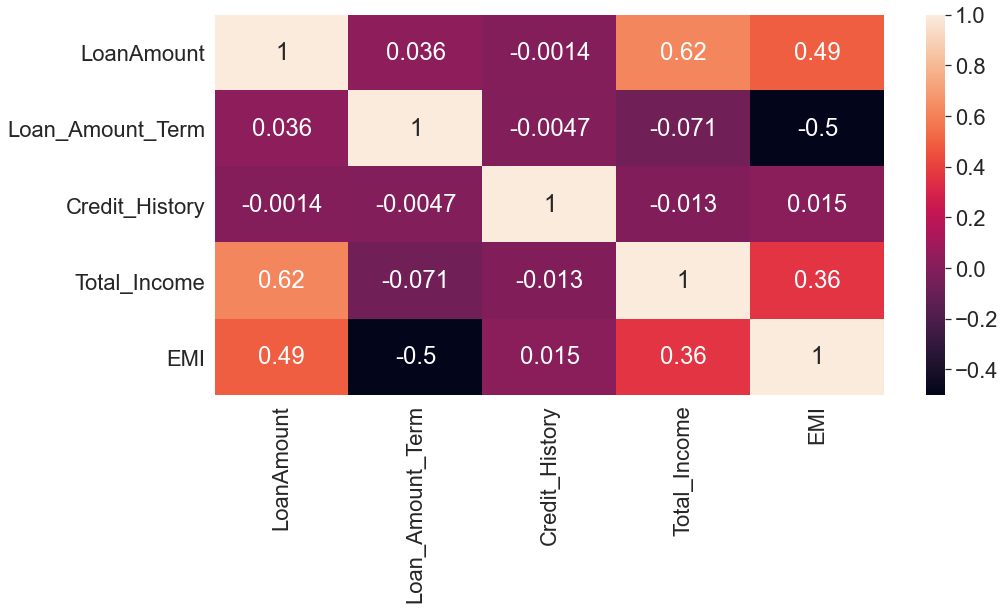

In [178]:
corr= df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True)

In [179]:
cols= ['Gender','Married','Dependents','Education','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Total_Income','EMI','Loan_Status']
feature_cols=['Gender','Married','Dependents','Education','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Total_Income','EMI']
feature_names=feature_cols

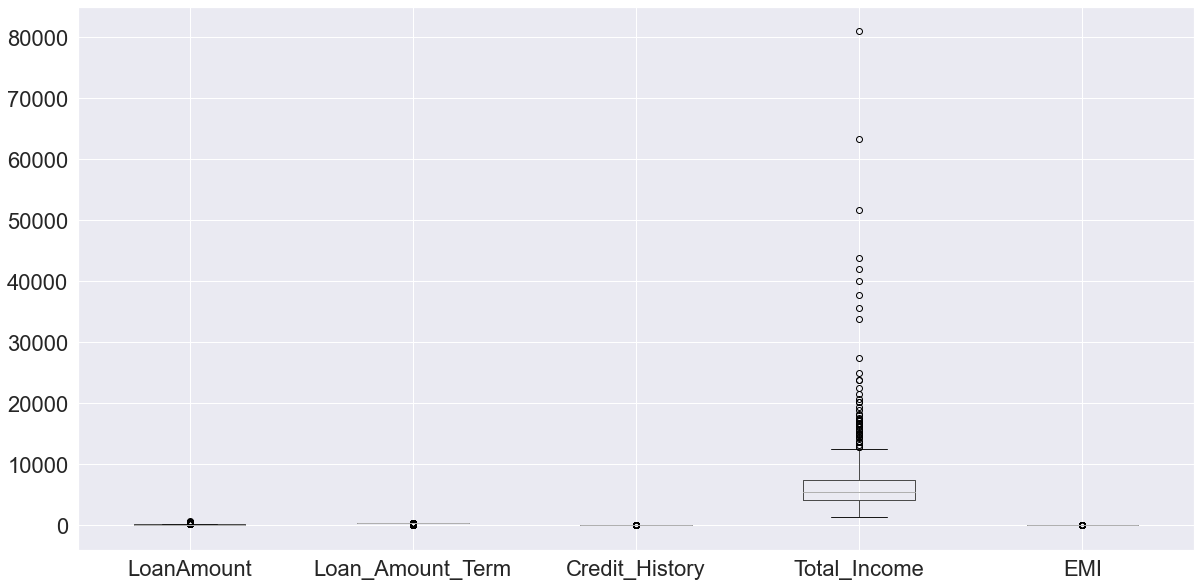

In [180]:
# Checking for Outliers
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

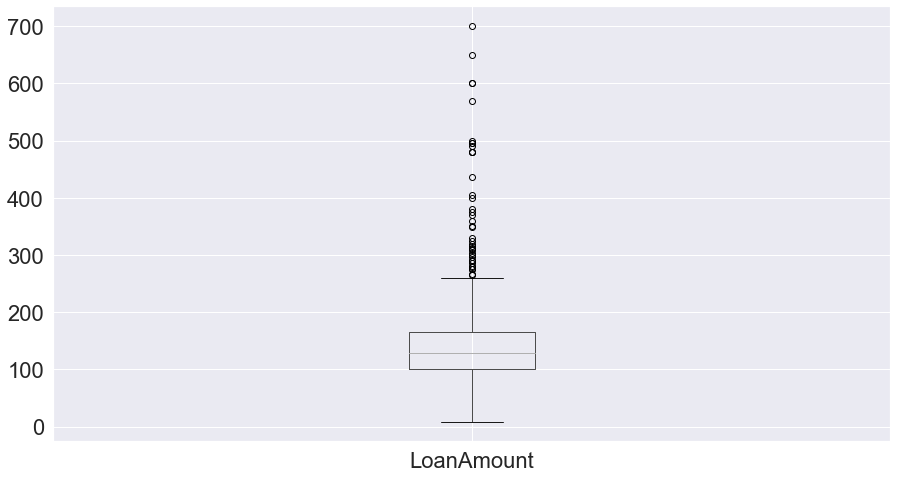

In [181]:
# Checking for One by One
plt.figure(figsize=(15,8))
df.boxplot('LoanAmount')
plt.show()

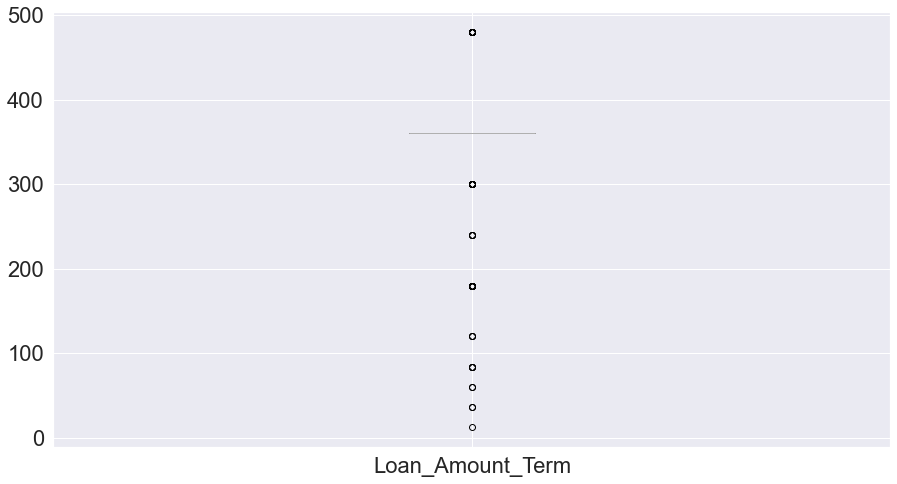

In [182]:
plt.figure(figsize=(15,8))
df.boxplot('Loan_Amount_Term')
plt.show()

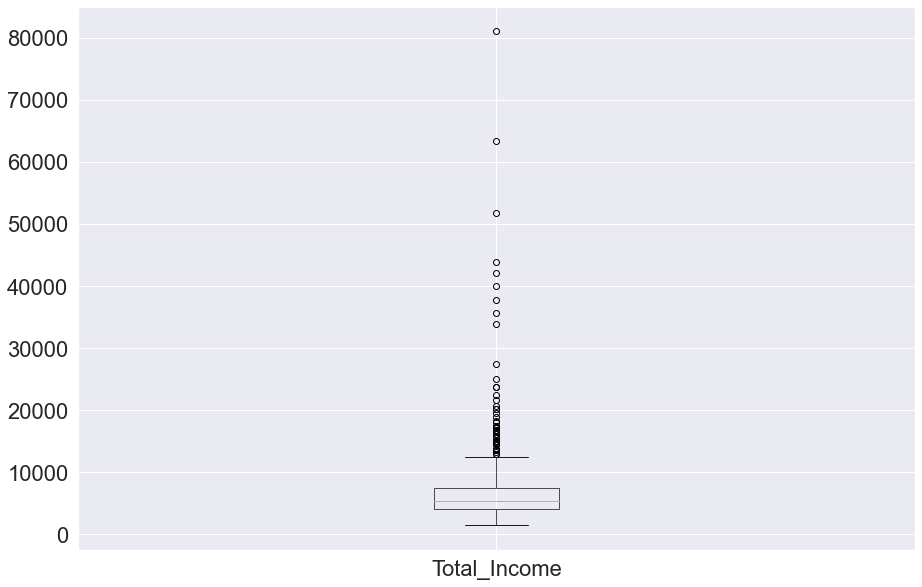

In [183]:
plt.figure(figsize=(15,10))
df.boxplot('Total_Income')
plt.show()

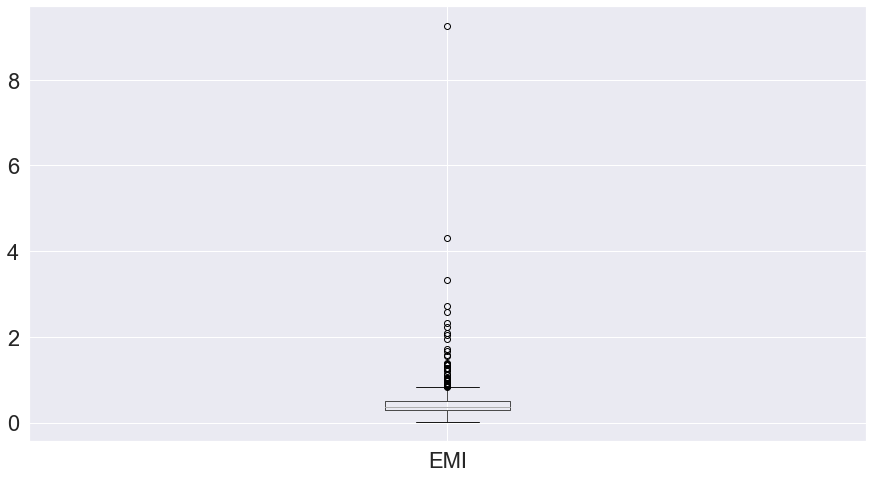

In [184]:
plt.figure(figsize=(15,8))
df.boxplot('EMI')
plt.show()

In [185]:
df.describe()

,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,EMI
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,146.412162,342.410423,0.855049,7024.705081,0.475728
std,84.037468,64.428629,0.352339,6458.663872,0.511056
min,9.000000,12.000000,0.000000,1442.000000,0.025000
25%,100.250000,360.000000,1.000000,4166.000000,0.288889
50%,129.000000,360.000000,1.000000,5416.500000,0.369444
75%,164.750000,360.000000,1.000000,7521.750000,0.505556
max,700.000000,480.000000,1.000000,81000.000000,9.250000


In [186]:
#Define a function to determine outlier boundaries
def outlier_limits(col):
  Q3, Q1 = np.nanpercentile(col, [75, 25])
  IQR = Q3 - Q1
  UL = Q3 + 1.5*IQR
  LL = Q1 - 1.5*IQR
  return UL, LL

In [190]:
#df.Credit_History=df.Credit_History.map({'0.0':'No','1.0':'Yes'})
df['Credit_History'].value_counts()
df['Credit_History'].replace([0,1],['No','Yes'], inplace=True)
df

In [192]:
#Apply the function to your data
for column in df.columns:
  if df[column].dtype != 'object':
    UL, LL = outlier_limits(df[column])
    df[column] = np.where((df[column] > UL) | (df[column] < LL), np.nan, df[column]) 

In [193]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
LoanAmount          41
Loan_Amount_Term    88
Credit_History       0
Property_Area        0
Total_Income        50
EMI                 50
Loan_Status          0
dtype: int64

In [194]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Total_Income'] = df['Total_Income'].fillna(df['Total_Income'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['EMI'] = df['EMI'].fillna(df['EMI'].mean())

In [195]:
df.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Total_Income        0
EMI                 0
Loan_Status         0
dtype: int64

## Feature Encoding

In [206]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
cols = ["Gender","Married","Property_Area","Education","Self_Employed", "Loan_Status", "Credit_History"]
for col in cols:
    df[col]= lb.fit_transform(df[col])

In [207]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,EMI,Loan_Status
0,1,0,0,0,0,146.412162,360.0,1,2,5849.0,0.406700,1
1,1,1,1,0,0,128.000000,360.0,1,0,6091.0,0.355556,0
2,1,1,0,0,1,66.000000,360.0,1,2,3000.0,0.183333,1
3,1,1,0,1,0,120.000000,360.0,1,2,4941.0,0.333333,1
4,1,0,0,0,0,141.000000,360.0,1,2,6000.0,0.391667,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.000000,360.0,1,0,2900.0,0.197222,1
610,1,1,3+,0,0,40.000000,360.0,1,0,4106.0,0.222222,1
611,1,1,1,0,0,253.000000,360.0,1,2,8312.0,0.702778,1
612,1,1,2,0,0,187.000000,360.0,1,2,7583.0,0.519444,1


In [208]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':4})
df['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

### Final Dataset

In [209]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,EMI,Loan_Status
0,1,0,0,0,0,146.412162,360.0,1,2,5849.0,0.406700,1
1,1,1,1,0,0,128.000000,360.0,1,0,6091.0,0.355556,0
2,1,1,0,0,1,66.000000,360.0,1,2,3000.0,0.183333,1
3,1,1,0,1,0,120.000000,360.0,1,2,4941.0,0.333333,1
4,1,0,0,0,0,141.000000,360.0,1,2,6000.0,0.391667,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.000000,360.0,1,0,2900.0,0.197222,1
610,1,1,4,0,0,40.000000,360.0,1,0,4106.0,0.222222,1
611,1,1,1,0,0,253.000000,360.0,1,2,8312.0,0.702778,1
612,1,1,2,0,0,187.000000,360.0,1,2,7583.0,0.519444,1


# Spliting Data into Train & Test set

In [210]:
from sklearn.model_selection import train_test_split
X= df.drop('Loan_Status', axis=1)
y= df["Loan_Status"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=51)



print(X_train.shape) 
print(y_train.shape)
print(X_test.shape) 
print(y_test.shape)


(491, 11)
(491,)
(123, 11)
(123,)


# Building Decision Tree Model

In [211]:
from sklearn.tree import DecisionTreeClassifier

dcf= DecisionTreeClassifier()
dcf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

## Train & Predict

In [212]:
# Train Decision Tree Classifer
train = dcf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dcf.predict(X_test)


[[19 17]
 [26 61]]
Accuracy score: 0.6504065040650406
Cross validation is 71.81927229108356


<AxesSubplot:>

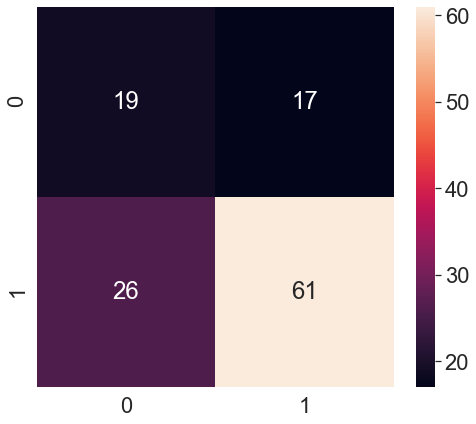

In [214]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)

accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
score = cross_val_score(dcf, X, y, cv=5)
print("Cross validation is",np.mean(score)*100)

plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True)

In [215]:
from sklearn.metrics import classification_report as cr
print(cr(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.53      0.47        36
           1       0.78      0.70      0.74        87

    accuracy                           0.65       123
   macro avg       0.60      0.61      0.60       123
weighted avg       0.68      0.65      0.66       123



## Visualization Decision Tree

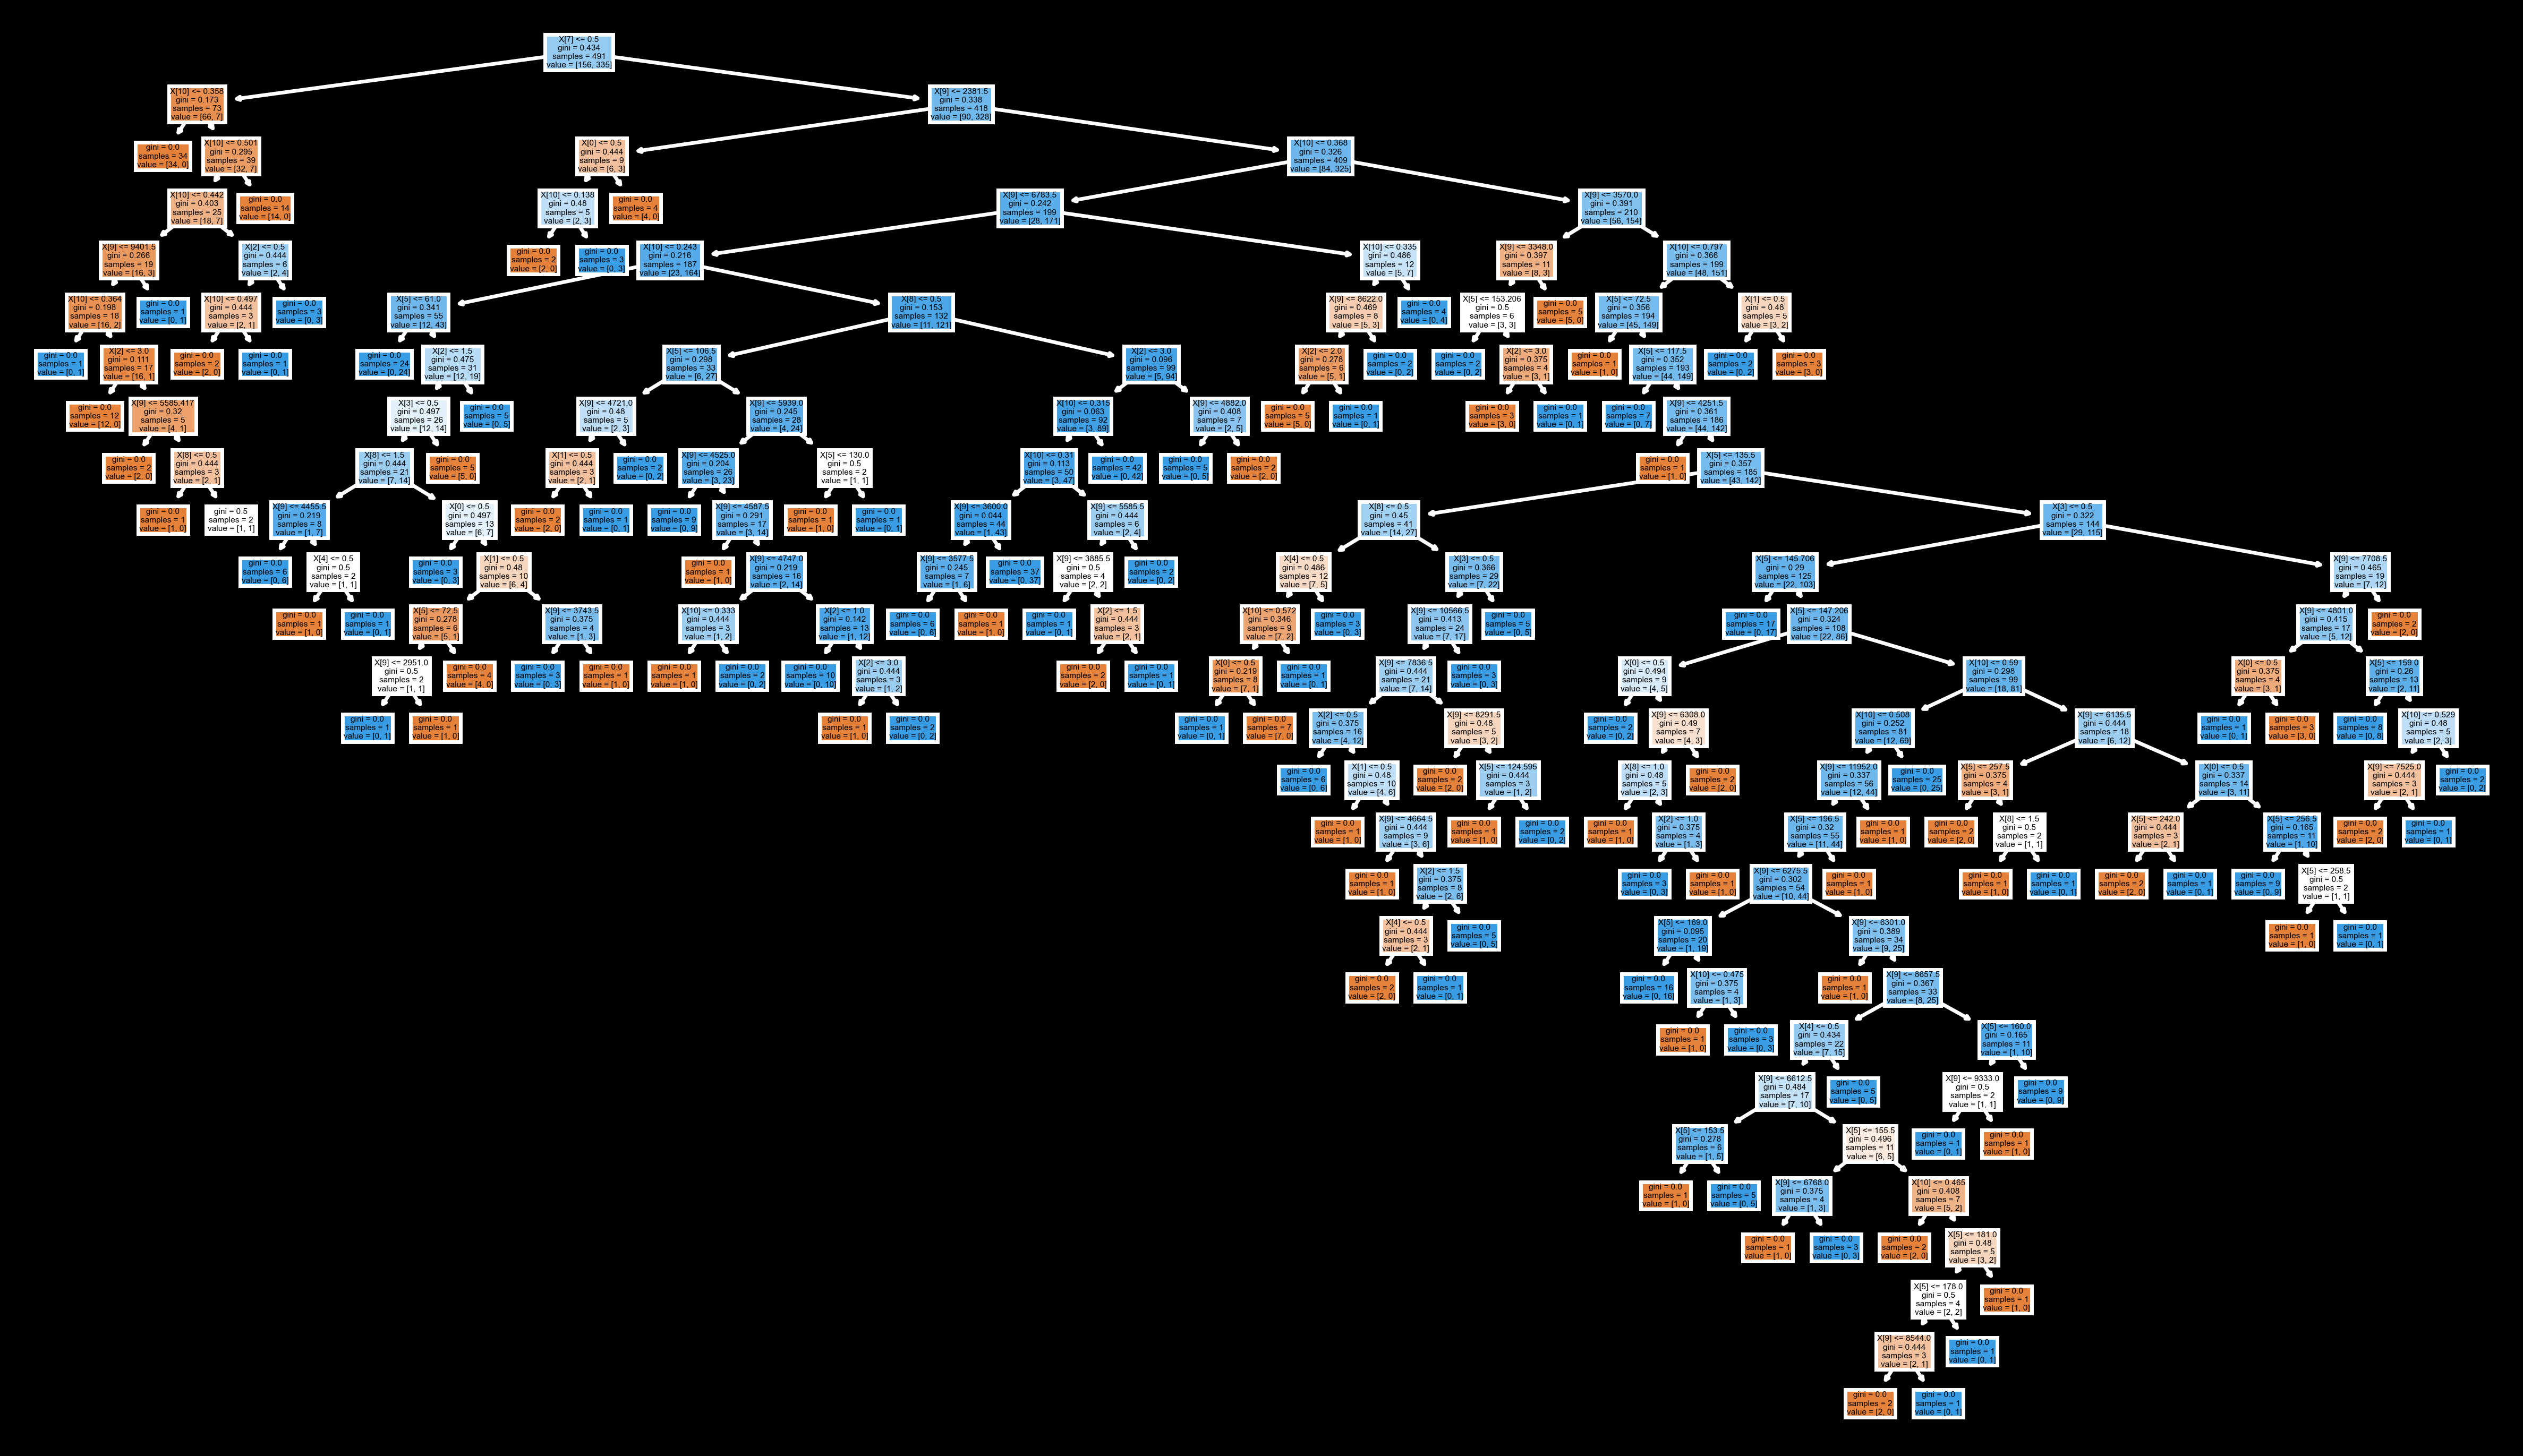

In [227]:
from sklearn import tree
import matplotlib as mpl

plt.style.use('dark_background')
mpl.rcParams['text.color'] = 'black'

plt.figure(figsize=(12, 7),dpi=500)
#plt.figure(figsize=(120, 70))
tree.plot_tree(dcf,filled=True);
plt.show()

## Optimization of Decision Tree

In [221]:
from sklearn.tree import DecisionTreeClassifier

clf= tree.DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [222]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Evaluation of Model after optimization

[[16 20]
 [ 0 87]]
Accuracy score: 83.73983739837398
Cross validation is 80.29721444755431


<AxesSubplot:>

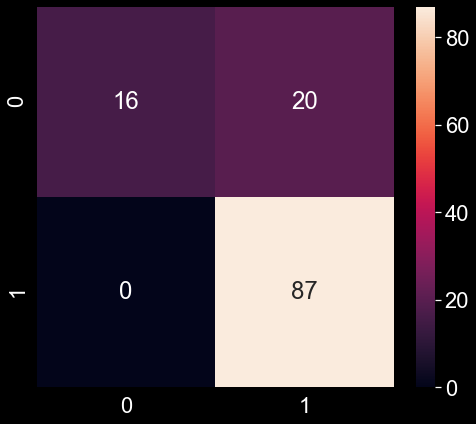

In [223]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

cm1 = metrics.confusion_matrix(y_test, y_pred) 
print(cm1)

accuracy1 = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",(accuracy1*100))
score1 = cross_val_score(clf, X, y, cv=5)
print("Cross validation is",np.mean(score1)*100)

plt.figure(figsize=(8,7))
sns.heatmap(cm1, annot=True)

In [224]:
print(cr(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.44      0.62        36
           1       0.81      1.00      0.90        87

    accuracy                           0.84       123
   macro avg       0.91      0.72      0.76       123
weighted avg       0.87      0.84      0.81       123



## Final Decision Tree Visualization

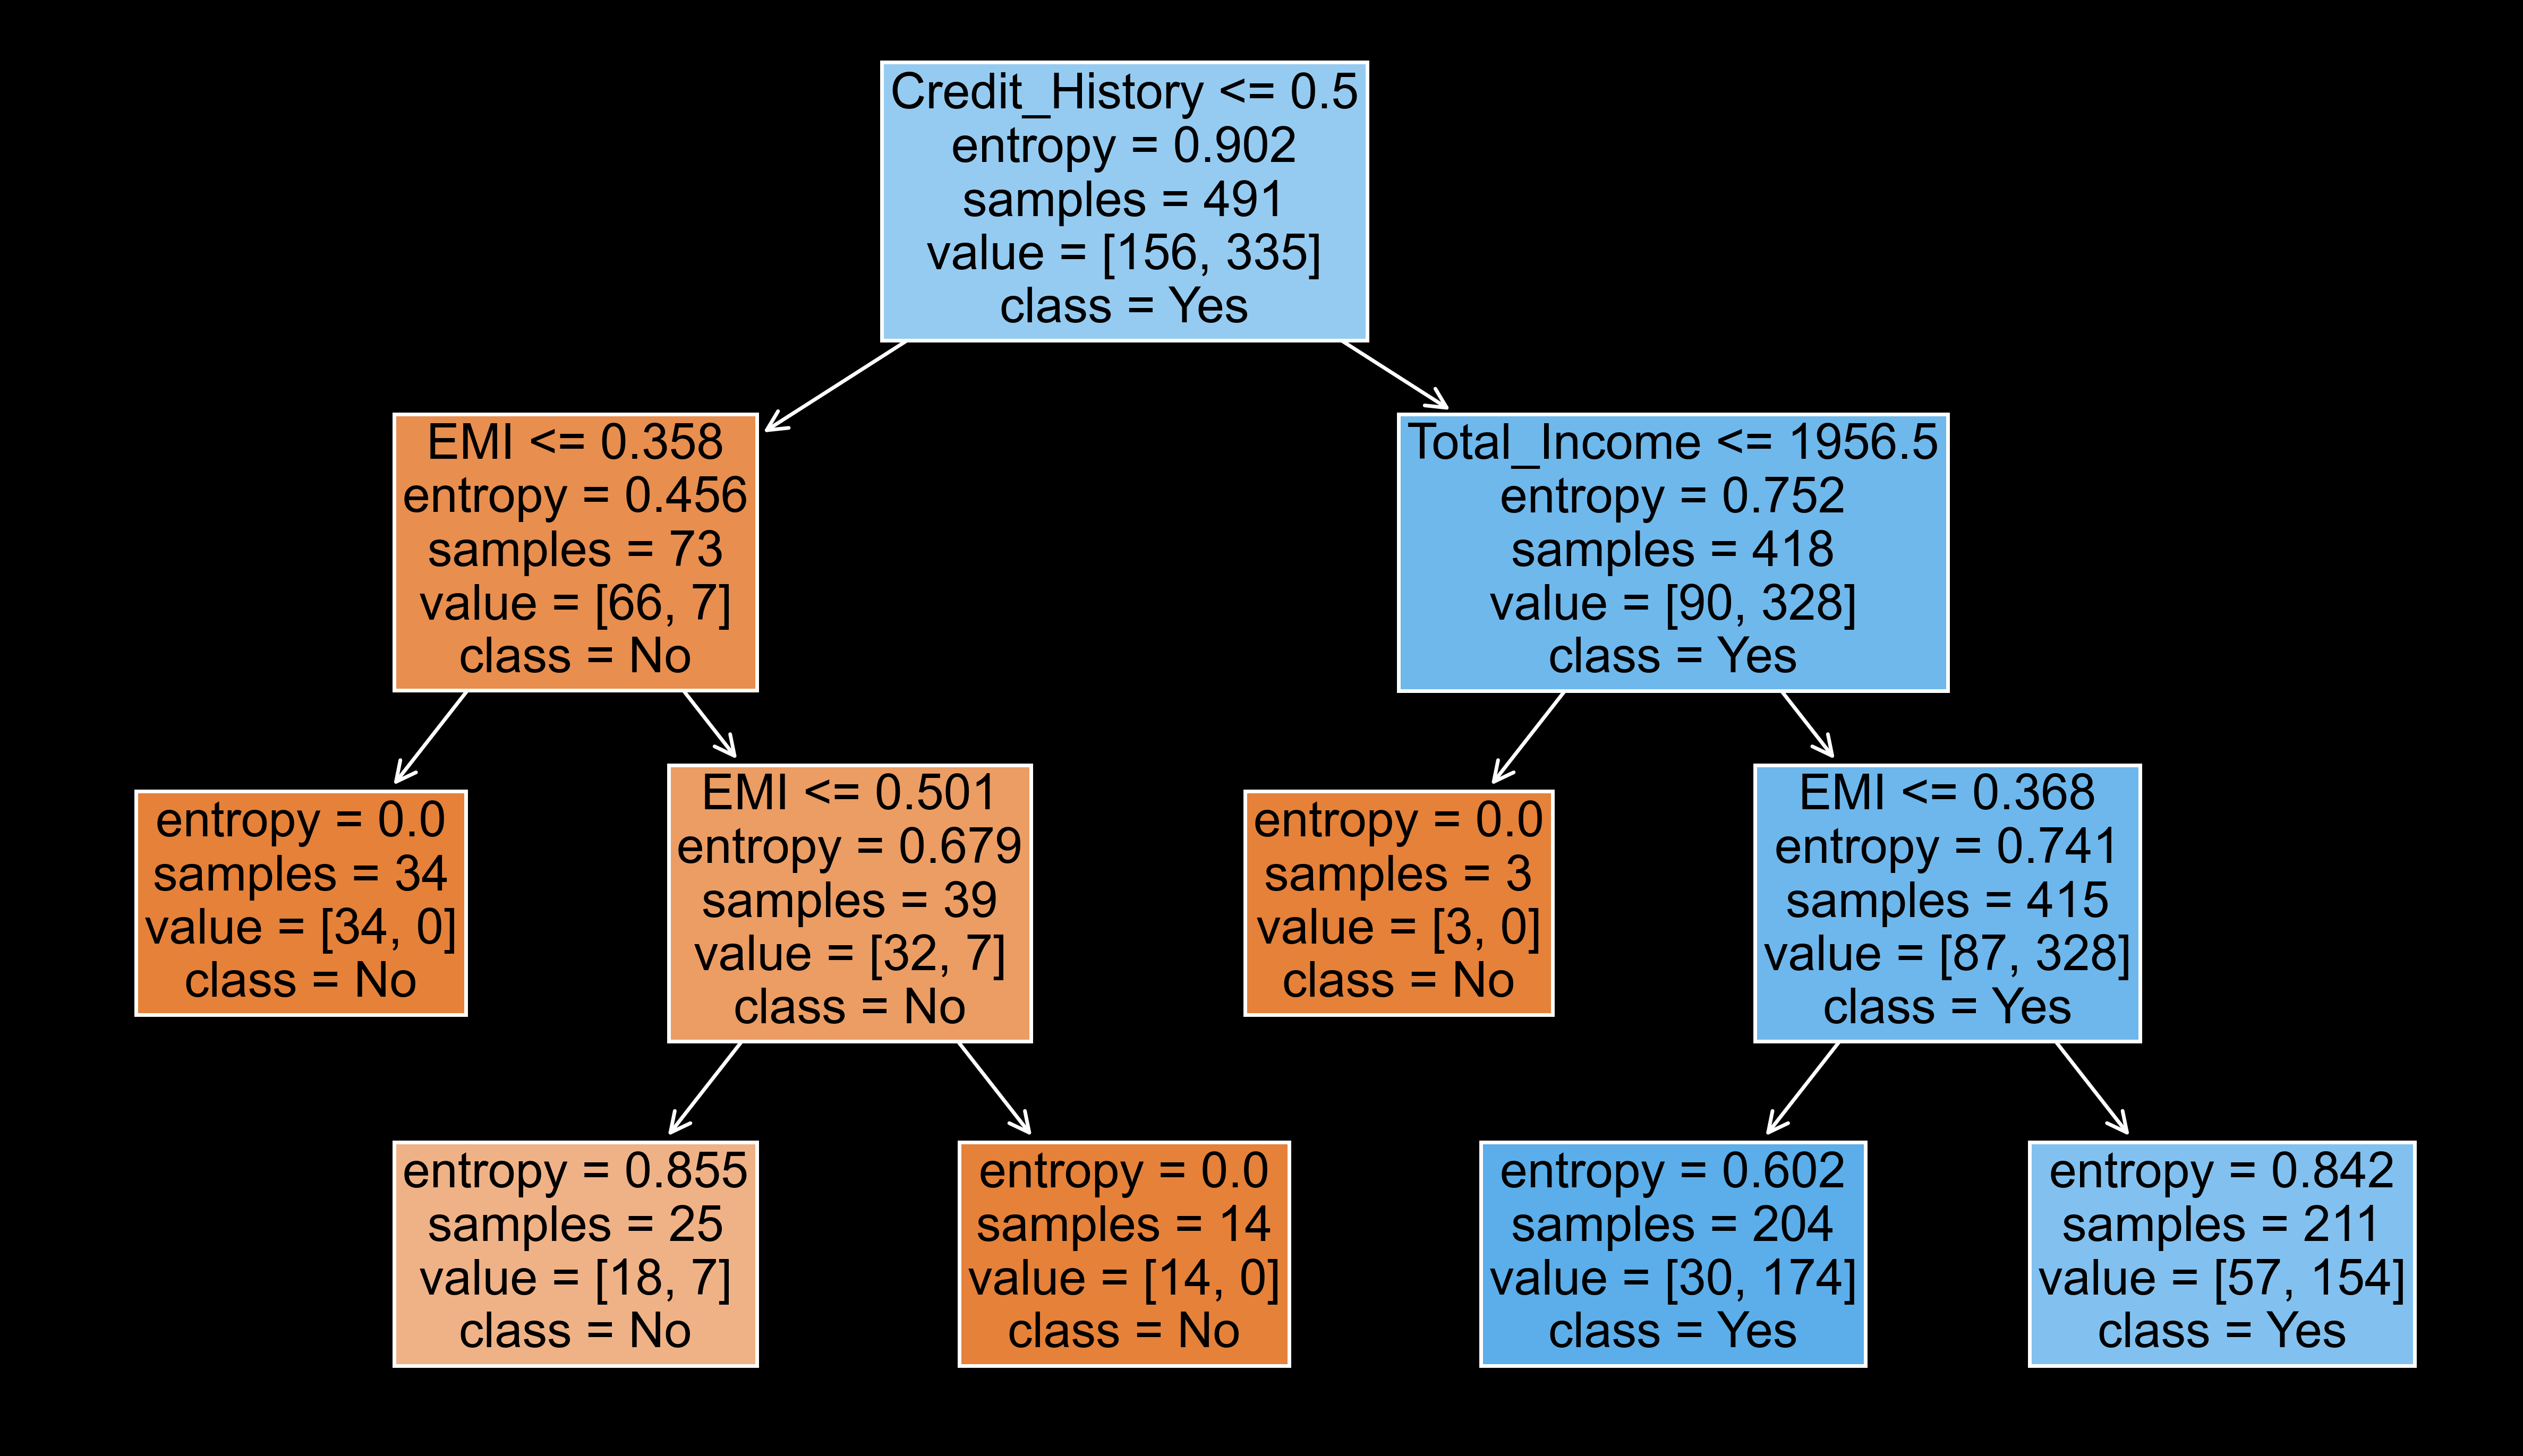

In [226]:
from sklearn import tree
import matplotlib as mpl
plt.style.use('dark_background')
mpl.rcParams['text.color'] = 'black'

plt.figure(figsize=(12, 7), dpi=500)
#plt.figure(figsize=(120, 70))
out= tree.plot_tree(clf,
               feature_names=feature_cols,
               class_names=["No", "Yes"],
               filled=True,
               );


plt.show(out)


In [228]:
df_importance = pd.DataFrame({'Features': X.columns,'Importance':clf.feature_importances_})
df_importance

,Features,Importance
0,Gender,0.000000
1,Married,0.000000
2,Dependents,0.000000
3,Education,0.000000
4,Self_Employed,0.000000
5,LoanAmount,0.000000
6,Loan_Amount_Term,0.000000
7,Credit_History,0.788891
8,Property_Area,0.000000
9,Total_Income,0.055427


## Random Forest Model

In [229]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()

In [230]:
rc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [231]:
# Traing of the Model
train_rc= rc.fit(X_train,y_train)

# Prediction of Model
y_pred2 = rc.predict(X_test)

[[17 19]
 [ 3 84]]
Accuracy score: 82.11382113821138
Cross validation is 78.50593096094897
F1 Score is 0.8842105263157896
              precision    recall  f1-score   support

           0       0.85      0.47      0.61        36
           1       0.82      0.97      0.88        87

    accuracy                           0.82       123
   macro avg       0.83      0.72      0.75       123
weighted avg       0.83      0.82      0.80       123



<AxesSubplot:>

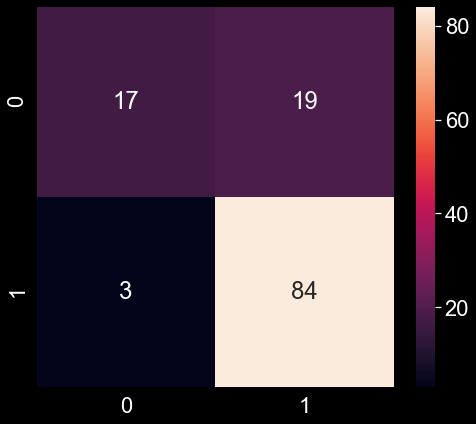

In [235]:
from sklearn.metrics import f1_score
cm2 = metrics.confusion_matrix(y_test, y_pred2) 
print(cm2)

accuracy2 = metrics.accuracy_score(y_test, y_pred2) 
print("Accuracy score:",(accuracy2*100))
score2 = cross_val_score(rc, X, y, cv=5)
print("Cross validation is",np.mean(score2)*100)
print("F1 Score is",f1_score(y_test,y_pred2))
report= cr(y_test,y_pred2)
print(report)
plt.figure(figsize=(8,7))
sns.heatmap(cm2, annot=True)

In [238]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [241]:
from sklearn.ensemble import RandomForestClassifier
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [242]:
rf_Model = RandomForestClassifier()

In [243]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [244]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   49.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   55.7s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:  1.6min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [251]:
best_params = {'bootstrap': True,
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 72}
print(best_params)

{'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 72}


In [246]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.802
Test Accuracy - : 0.837


In [256]:
rfc = RandomForestClassifier(class_weight='balanced',
                                      bootstrap='True',
                                      criterion='entropy',
                                      max_depth=2,
                                      max_features='sqrt',
                                      min_samples_leaf=1,
                                      min_samples_split=2,
                                      n_estimators=72)

In [257]:
rfc.fit(X_train,y_train)

y_pred3= rfc.predict(X_test)

In [258]:
print(cr(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.44      0.62        36
           1       0.81      1.00      0.90        87

    accuracy                           0.84       123
   macro avg       0.91      0.72      0.76       123
weighted avg       0.87      0.84      0.81       123



[[16 20]
 [ 0 87]]
Accuracy score: 83.73983739837398
Cross validation is 78.18072770891644
F1 Score is 0.8969072164948454
              precision    recall  f1-score   support

           0       1.00      0.44      0.62        36
           1       0.81      1.00      0.90        87

    accuracy                           0.84       123
   macro avg       0.91      0.72      0.76       123
weighted avg       0.87      0.84      0.81       123



<AxesSubplot:>

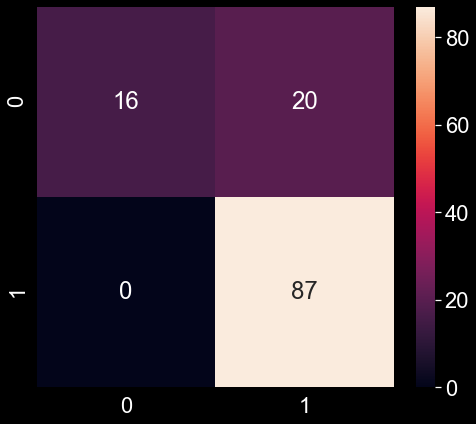

In [259]:
from sklearn.metrics import f1_score
cm3 = metrics.confusion_matrix(y_test, y_pred3) 
print(cm3)

accuracy3 = metrics.accuracy_score(y_test, y_pred3) 
print("Accuracy score:",(accuracy3*100))
score3 = cross_val_score(rc, X, y, cv=5)
print("Cross validation is",np.mean(score3)*100)
print("F1 Score is",f1_score(y_test,y_pred3))
report= cr(y_test,y_pred3)
print(report)
plt.figure(figsize=(8,7))
sns.heatmap(cm3, annot=True)

## Randomized Search

In [260]:
n_estimators_list = list(range(10,220,50))
criterion_list = ['gini', 'entropy']
max_depth_list = list(range(5,41,10))
max_depth_list.append(None)
min_samples_split_list = [x/1000 for x in list(range(5, 41, 10))]
min_samples_leaf_list = [x/1000 for x in list(range(5, 41, 10))]
max_features_list = ['sqrt', 'log2']

params_grid = {
    'n_estimators': n_estimators_list,
    'criterion': criterion_list,
    'max_depth': max_depth_list,
    'min_samples_split': min_samples_split_list,
    'min_samples_leaf': min_samples_leaf_list,
    'max_features': max_features_list
}

num_combinations = 1
for k in params_grid.keys(): num_combinations *= len(params_grid[k])

print('Number of combinations = ', num_combinations)
params_grid

Number of combinations =  1600


{'n_estimators': [10, 60, 110, 160, 210],
 'criterion': ['gini', 'entropy'],
 'max_depth': [5, 15, 25, 35, None],
 'min_samples_split': [0.005, 0.015, 0.025, 0.035],
 'min_samples_leaf': [0.005, 0.015, 0.025, 0.035],
 'max_features': ['sqrt', 'log2']}

In [262]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics

def my_roc_auc_score(model, X, y): return metrics.roc_auc_score(y, model.predict(X))

model_rf = RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                              param_distributions=params_grid,
                              n_iter=50,
                              cv=3,
                              scoring=my_roc_auc_score,
                              return_train_score=True,
                              verbose=2)

model_rf.fit(X,y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_estimators=10, min_samples_split=0.035, min_samples_leaf=0.005, max_features=sqrt, max_depth=5, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=0.035, min_samples_leaf=0.005, max_features=sqrt, max_depth=5, criterion=entropy, total=   0.1s
[CV] n_estimators=10, min_samples_split=0.035, min_samples_leaf=0.005, max_features=sqrt, max_depth=5, criterion=entropy 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=10, min_samples_split=0.035, min_samples_leaf=0.005, max_features=sqrt, max_depth=5, criterion=entropy, total=   0.1s
[CV] n_estimators=10, min_samples_split=0.035, min_samples_leaf=0.005, max_features=sqrt, max_depth=5, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=0.035, min_samples_leaf=0.005, max_features=sqrt, max_depth=5, criterion=entropy, total=   0.0s
[CV] n_estimators=110, min_samples_split=0.015, min_samples_leaf=0.015, max_features=sqrt, max_depth=15, criterion=entropy 
[CV]  n_estimators=110, min_samples_split=0.015, min_samples_leaf=0.015, max_features=sqrt, max_depth=15, criterion=entropy, total=   0.3s
[CV] n_estimators=110, min_samples_split=0.015, min_samples_leaf=0.015, max_features=sqrt, max_depth=15, criterion=entropy 
[CV]  n_estimators=110, min_samples_split=0.015, min_samples_leaf=0.015, max_features=sqrt, max_depth=15, criterion=entropy, total=   0.5s
[CV] n_estimators=110, min_samples_split=0.015, min_samples_leaf=0.015, max_fe

[CV]  n_estimators=60, min_samples_split=0.005, min_samples_leaf=0.025, max_features=log2, max_depth=15, criterion=entropy, total=   0.2s
[CV] n_estimators=60, min_samples_split=0.005, min_samples_leaf=0.025, max_features=log2, max_depth=15, criterion=entropy 
[CV]  n_estimators=60, min_samples_split=0.005, min_samples_leaf=0.025, max_features=log2, max_depth=15, criterion=entropy, total=   0.2s
[CV] n_estimators=60, min_samples_split=0.005, min_samples_leaf=0.025, max_features=log2, max_depth=15, criterion=entropy 
[CV]  n_estimators=60, min_samples_split=0.005, min_samples_leaf=0.025, max_features=log2, max_depth=15, criterion=entropy, total=   0.2s
[CV] n_estimators=60, min_samples_split=0.005, min_samples_leaf=0.015, max_features=log2, max_depth=35, criterion=entropy 
[CV]  n_estimators=60, min_samples_split=0.005, min_samples_leaf=0.015, max_features=log2, max_depth=35, criterion=entropy, total=   0.2s
[CV] n_estimators=60, min_samples_split=0.005, min_samples_leaf=0.015, max_feat

[CV] n_estimators=10, min_samples_split=0.035, min_samples_leaf=0.015, max_features=sqrt, max_depth=25, criterion=gini 
[CV]  n_estimators=10, min_samples_split=0.035, min_samples_leaf=0.015, max_features=sqrt, max_depth=25, criterion=gini, total=   0.0s
[CV] n_estimators=60, min_samples_split=0.015, min_samples_leaf=0.015, max_features=log2, max_depth=35, criterion=entropy 
[CV]  n_estimators=60, min_samples_split=0.015, min_samples_leaf=0.015, max_features=log2, max_depth=35, criterion=entropy, total=   0.2s
[CV] n_estimators=60, min_samples_split=0.015, min_samples_leaf=0.015, max_features=log2, max_depth=35, criterion=entropy 
[CV]  n_estimators=60, min_samples_split=0.015, min_samples_leaf=0.015, max_features=log2, max_depth=35, criterion=entropy, total=   0.2s
[CV] n_estimators=60, min_samples_split=0.015, min_samples_leaf=0.015, max_features=log2, max_depth=35, criterion=entropy 
[CV]  n_estimators=60, min_samples_split=0.015, min_samples_leaf=0.015, max_features=log2, max_depth

[CV]  n_estimators=210, min_samples_split=0.015, min_samples_leaf=0.015, max_features=sqrt, max_depth=35, criterion=entropy, total=   0.6s
[CV] n_estimators=210, min_samples_split=0.015, min_samples_leaf=0.015, max_features=sqrt, max_depth=35, criterion=entropy 
[CV]  n_estimators=210, min_samples_split=0.015, min_samples_leaf=0.015, max_features=sqrt, max_depth=35, criterion=entropy, total=   0.6s
[CV] n_estimators=160, min_samples_split=0.015, min_samples_leaf=0.005, max_features=sqrt, max_depth=15, criterion=gini 
[CV]  n_estimators=160, min_samples_split=0.015, min_samples_leaf=0.005, max_features=sqrt, max_depth=15, criterion=gini, total=   0.5s
[CV] n_estimators=160, min_samples_split=0.015, min_samples_leaf=0.005, max_features=sqrt, max_depth=15, criterion=gini 
[CV]  n_estimators=160, min_samples_split=0.015, min_samples_leaf=0.005, max_features=sqrt, max_depth=15, criterion=gini, total=   0.5s
[CV] n_estimators=160, min_samples_split=0.015, min_samples_leaf=0.005, max_features

[CV]  n_estimators=60, min_samples_split=0.035, min_samples_leaf=0.035, max_features=log2, max_depth=None, criterion=gini, total=   0.2s
[CV] n_estimators=60, min_samples_split=0.035, min_samples_leaf=0.035, max_features=log2, max_depth=None, criterion=gini 
[CV]  n_estimators=60, min_samples_split=0.035, min_samples_leaf=0.035, max_features=log2, max_depth=None, criterion=gini, total=   0.1s
[CV] n_estimators=110, min_samples_split=0.015, min_samples_leaf=0.015, max_features=log2, max_depth=35, criterion=entropy 
[CV]  n_estimators=110, min_samples_split=0.015, min_samples_leaf=0.015, max_features=log2, max_depth=35, criterion=entropy, total=   0.3s
[CV] n_estimators=110, min_samples_split=0.015, min_samples_leaf=0.015, max_features=log2, max_depth=35, criterion=entropy 
[CV]  n_estimators=110, min_samples_split=0.015, min_samples_leaf=0.015, max_features=log2, max_depth=35, criterion=entropy, total=   0.3s
[CV] n_estimators=110, min_samples_split=0.015, min_samples_leaf=0.015, max_fe

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   48.3s finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 15, 25, 35, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [0.005, 0.015,
                                                             0.025, 0.035],
                                        'min_samples_split': [0.005, 0.015,
                                                              0.025, 0.035],
                                        'n_estimators': [10, 60, 110, 160,
                                                         210]},
                   return_train_score=True,
                   scoring=<function my_roc_auc_score at 0x000002481A2E6040>,
                   verbose=2)

In [263]:
print (f'Train Accuracy - : {model_rf.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {model_rf.score(X_test,y_test):.3f}')

Train Accuracy - : 0.809
Test Accuracy - : 0.794


In [264]:
model_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 0.025,
 'min_samples_leaf': 0.005,
 'max_features': 'log2',
 'max_depth': 25,
 'criterion': 'entropy'}

In [266]:
rfc_rs= RandomForestClassifier(class_weight='balanced',
                                      
                                      criterion='entropy',
                                      max_depth=25,
                                      max_features='log2',
                                      min_samples_leaf=0.005,
                                      min_samples_split=0.025,
                                      n_estimators=10)

In [267]:
rfc_rs.fit(X_train,y_train)

y_pred4= rfc_rs.predict(X_test)

[[19 17]
 [11 76]]
Accuracy score: 77.23577235772358
Cross validation is 78.34332933493269
F1 Score is 0.8444444444444446
              precision    recall  f1-score   support

           0       0.63      0.53      0.58        36
           1       0.82      0.87      0.84        87

    accuracy                           0.77       123
   macro avg       0.73      0.70      0.71       123
weighted avg       0.76      0.77      0.77       123



<AxesSubplot:>

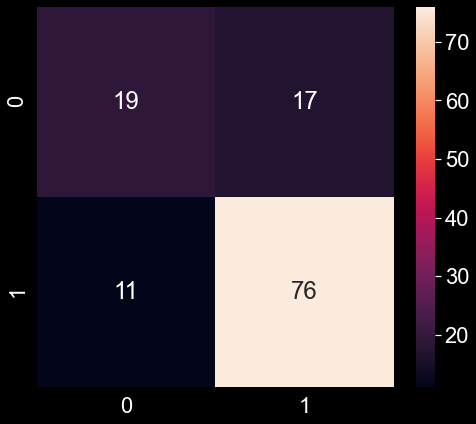

In [268]:
from sklearn.metrics import f1_score
cm4 = metrics.confusion_matrix(y_test, y_pred4) 
print(cm4)

accuracy4 = metrics.accuracy_score(y_test, y_pred4) 
print("Accuracy score:",(accuracy4*100))
score4 = cross_val_score(rc, X, y, cv=5)
print("Cross validation is",np.mean(score4)*100)
print("F1 Score is",f1_score(y_test,y_pred4))
report= cr(y_test,y_pred4)
print(report)
plt.figure(figsize=(8,7))
sns.heatmap(cm4, annot=True)

NameError: name 'loan_train' is not defined